#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that was developed by the consultant. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [1]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load and select relevant subset of the data.
# Make sure to change the relative path to function in your environment.
ds1 = pd.read_csv('git/assignment/covid_19_uk_cases.csv')
ds2 = pd.read_csv('git/assignment/covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [3]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [4]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above. 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe.
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [5]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

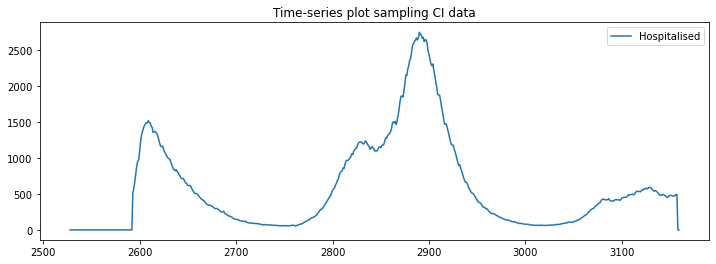

In [2]:
# Demonstrate the use of the function to plot moving averages

# YOUR CODE HERE

# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

sample_ci = sample[sample['Province/State'] == "Channel Islands"]

# Plotting the time series data
sample_ci.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time-series plot sampling CI data')
plt.show(block=False);

# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above. 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe.
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)


In [1]:
# Demonstrate the use of the function to plot moving averages



# MODEL ANSWER END

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [32]:
# Return top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

NameError: name 'mean_absolute_error' is not defined

### Question 3:

The management team had some additional questions around the project where they asked for additional feedback to be included in your final presentation. Make sure to answer the questions in the notebook in markdown format in preparation for your presentation. They expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data and how can this be used in predictions?

Quantitative data is numerical, it is considered to be anything that is universal and can be counted and measured while qualitative data is descriptive and based on interpretations and observations. Quantitative data can be used in predictions by referencing graphs of collected data that has been analysed to record performance and the decription derived from the data can be can inferences to the future. Qualitative data can be used for predictions by studying the opinions and environments of the study focus to predict perceptions.

#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Continuous improvement is required in research as it improves the overall quality of it. Making constant changes where processes are improved, wasted time and effort is eliminated and quality is refined can lead to impactful changes to the data and insight which would have been unobtainable without constant assessment. Continuous improvement also enabvles the business to adapt quickly to changes in study subject in realtime. In the covid cases data, the number of cases, recoveries and deaths are constantly changing. Being able to adapt enables the project to focus on changes quickly as well as intercept new information such as externasl stimuli which may influence the study.

#### Question 3.2 (double click cell to edit)
- We adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics. We only work with aggregated data and therefore will not expose any personal details? (is it different, example of how it could apply to this case; two or three sentences max)

Adhereing to data protection doesn't mean that data ethics can be ignored. While data protection refers to how data is collected and disseminated, in the case of the covid data there are no personal details, we must still consider how the anaylsis of this data will influence decisions and impact people and society e.g. how informing the population of Bermuda to expect a rising covid death rate without causing hysteria. Data ethics cover the moral obligations research have to consider when assessing problems and encourages creation of reasonable solutions.  